### Introduction

This study combines two international datasets to explore how marriage patterns relate to labour-market participation, with a particular focus on women. 

The first dataset contains **marriage indicators**, including the **percentage of adolescents aged 15–19 who have ever been married** and the **Singulate Mean Age at Marriage (SMAM)** for both women and men. These measures capture both early marriage prevalence and the average timing of first marriage across a wide range of countries.

The second dataset focuses on **part-time employment**, reporting the percentage of adult women and men working in part-time jobs, as well as the **women’s share of total part-time employment**. These indicators reveal gender differences in labour-market structures and the extent to which countries rely on flexible or reduced-hour work.

Both datasets are drawn from recognised sources such as **UNSD**, **DHS**, **ILO**, **LFS/ELFS**, **HS**, **USCB**, and national statistics offices. Because they originate from different surveys and reference years, their temporal coverage varies across countries.

---

### Cross-Dataset Merge

To examine possible links between **marriage timing** and **female labour-market participation**, the two datasets were merged using **Country or Area** and **Year** as common keys. Due to differences in data availability, only countries that appear in both datasets for the same year could be matched. Although this reduces the original sample size, the merged dataset still provides a consistent basis for an exploratory comparison.

This combined structure enables a side-by-side analysis of demographic and economic indicators, supporting the investigation of whether **marriage age**, especially among women, is associated with patterns of **part-time employment**. It also allows for a broader understanding of gender differences, cultural norms and regional labour-market characteristics.

In [1]:
# Import the main libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Marriages Dataset

In [2]:
# Read the file skipping the first 4 rows (before the real header)
df = pd.read_excel("Marriages.xls", engine="xlrd", skiprows=5)

# Show the first rows
df.head()

,Country or area,Year,Women,Men,Unnamed: 4,Women.1,Men.1,Unnamed: 7,Unnamed: 8
0,Afghanistan,2010,17.3,…,NaN,21.5,…,NaN,DHS
1,Albania,2011,7.2,2,NaN,25.1,29.2,NaN,NS
2,Algeria,2002,1.8,0.2,NaN,29.5,33,NaN,PAPFAM
3,American Samoa,2000,21.4,…,NaN,25.7,…,NaN,USCB
4,Angola,1970,35.7,7.6,NaN,19.4,24.5,NaN,USCB


In [3]:
# Drop columns that contain only NaN values
# This removes 'Unnamed: 4' and 'Unnamed: 7'
df = df.dropna(axis=1, how='all')

# Display remaining columns
df.columns

Index(['Country or area', 'Year', 'Women', 'Men', 'Women.1', 'Men.1',
       'Unnamed: 8'],
      dtype='object')

In [4]:
df

,Country or area,Year,Women,Men,Women.1,Men.1,Unnamed: 8
0,Afghanistan,2010,17.3,…,21.5,…,DHS
1,Albania,2011,7.2,2,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33,PAPFAM
3,American Samoa,2000,21.4,…,25.7,…,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [5]:
# Rename columns to meaningful names for analysis

#RENAMING THE HEADERS (FROM XXX TO XXX)
#Population aged 15-19 ever married (%): 
#FROM Women TO Women_15_19_Married
#FROM Men TO Men_15_19_Married

#Singulate mean age at marriage (SMAM)
# FROM Women TO SMAM_Women
# FROM Men TO SMAM_Men


df = df.rename(columns={
    "Country or area": "Country or Area",
    "Women": "Women_15_19_Ever Married",
    "Men": "Men_15_19_Ever Married",
    "Women.1": "SMAM_Women",
    "Men.1": "SMAM_Men",
    "Unnamed: 8": "Source"
})

In [6]:
# Show the cleaned dataframe structure
df.head()

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,…,21.5,…,DHS
1,Albania,2011,7.2,2,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33,PAPFAM
3,American Samoa,2000,21.4,…,25.7,…,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB


In [7]:
# Provide a short summary information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Area           217 non-null    object 
 1   Year                      217 non-null    int64  
 2   Women_15_19_Ever Married  217 non-null    float64
 3   Men_15_19_Ever Married    217 non-null    object 
 4   SMAM_Women                217 non-null    float64
 5   SMAM_Men                  217 non-null    object 
 6   Source                    217 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.0+ KB


Some data types in the table do not match the actual values.
Columns that should contain numbers (such as Men_15_19_Married and SMAM_Men) are still stored as object type because the original file used "..." for missing values.
This causes Pandas to treat the whole column as text.

Before running statistical analysis, these columns must be converted to numeric so that calculations like mean, median, and standard deviation can be performed correctly.

In [8]:
# Convert SMAM_Men column from text to numeric values.
# The original file contained "..." which forces the column to be stored as object.
# Using errors="coerce" transforms invalid values into NaN.
df["SMAM_Men"] = pd.to_numeric(df["SMAM_Men"], errors="coerce")

# Convert Men_15_19_Married column from text to numeric values.
# This ensures that we can compute statistics such as mean, median, and standard deviation.
df["Men_15_19_Ever Married"] = pd.to_numeric(df["Men_15_19_Ever Married"], errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Area           217 non-null    object 
 1   Year                      217 non-null    int64  
 2   Women_15_19_Ever Married  217 non-null    float64
 3   Men_15_19_Ever Married    197 non-null    float64
 4   SMAM_Women                217 non-null    float64
 5   SMAM_Men                  197 non-null    float64
 6   Source                    217 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.0+ KB


In [10]:
df

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,NaN,21.5,NaN,DHS
1,Albania,2011,7.2,2.0,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33.0,PAPFAM
3,American Samoa,2000,21.4,NaN,25.7,NaN,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [11]:
# What are the column names?
df.columns

Index(['Country or Area', 'Year', 'Women_15_19_Ever Married',
       'Men_15_19_Ever Married', 'SMAM_Women', 'SMAM_Men', 'Source'],
      dtype='object')

In [12]:
# How many columns does the dataframe have?
len(df.columns)

7

In [13]:
# And how many rows?
len(df)

217

In [14]:
# How many missing values in each column?/Numbers of missing values in each column
df.isna().sum()

Country or Area              0
Year                         0
Women_15_19_Ever Married     0
Men_15_19_Ever Married      20
SMAM_Women                   0
SMAM_Men                    20
Source                       0
dtype: int64

In [15]:
#Changing the name of the table from 'df' to 'mar'

mar = df

In [16]:
# Removing rows where the 'Men_15_19_Married' and 'SMAM_Men'columns contains missing values (NaN).
# rows with missing values in this column are removed.
#mar = df.dropna(subset=["Men_15_19_Married"]).copy()
#mar = df.dropna(subset=["SMAM_Men"]).copy()

In [17]:
mar

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,NaN,21.5,NaN,DHS
1,Albania,2011,7.2,2.0,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33.0,PAPFAM
3,American Samoa,2000,21.4,NaN,25.7,NaN,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [18]:
# Give the basic statistics of numerical columns
mar.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,217.0,2004.921659,6.801984,1970.0,2002.0,2007.0,2010.0,2011.0
Women_15_19_Ever Married,217.0,11.496774,11.943980,0.0,1.8,7.7,18.3,60.6
Men_15_19_Ever Married,197.0,2.074619,2.700220,0.0,0.2,1.1,2.9,19.0
SMAM_Women,217.0,25.085253,3.847542,17.6,22.0,24.4,28.2,33.3
SMAM_Men,197.0,28.753807,3.128987,22.4,26.2,28.3,31.3,36.5


### Interpretation of the Descriptive Statistics Table

1. **Year**
- The dataset includes observations from **1970 to 2011**.
- The average year is **2004.9**, showing that the dataset is predominantly recent.
- The standard deviation of **6.8** indicates a relatively narrow spread, meaning most entries are concentrated between 2000 and 2011.
- The quartiles (2002, 2007, 2010) confirm that 75% of the data is from the 21st century.

---

2. **Women_15_19_Ever Married (%)**
- Mean: **11.50%**
- Median: **7.7%**
- Minimum: **0%**
- Maximum: **60.6%**
- Quartiles: **1.8% (25%)**, **18.3% (75%)**
- Standard deviation: **11.94**

**Interpretation:**  
The distribution is highly unequal.  
More than half of the countries report values below 10%, yet the maximum reaches 60.6%.  
The high standard deviation and wide gap between quartiles indicate strong variation between countries.  
This shows that early marriage among teenage girls is rare in most places but extremely prevalent in a few countries.

---

3. **Men_15_19_Ever Married (%)**
- Mean: **2.07%**
- Median: **1.1%**
- Minimum: **0%**
- Maximum: **19%**
- Quartiles: **0.2% (25%)**, **2.9% (75%)**
- Standard deviation: **2.70**

**Interpretation:**  
Teenage marriage among boys is uncommon worldwide.  
Half of the countries have values close to zero, and even the highest value (19%) is far below the female maximum.  
The smaller standard deviation shows that teenage male marriage is more uniformly low across countries, confirming a strong gender imbalance.

---

4. **SMAM_Women (Singulate Mean Age at Marriage – Women)**
- Mean: **25.08 years**
- Median: **24.4 years**
- Minimum: **17.6**
- Maximum: **33.3**
- Quartiles: **22.0 (25%)**, **28.2 (75%)**
- Standard deviation: **3.85**

**Interpretation:**  
Women typically marry in their mid-20s.  
However, the range from 17.6 to 33.3 years reveals large cross-country variation.  
The quartiles show that 50% of countries have SMAM between 22 and 28 years.  
A minority of countries fall below 20 (very early marriage) or above 30 (very late marriage).

---

5. **SMAM_Men (Singulate Mean Age at Marriage – Men)**
- Mean: **28.75 years**
- Median: **28.3 years**
- Minimum: **22.4**
- Maximum: **36.5**
- Quartiles: **26.2 (25%)**, **31.3 (75%)**
- Standard deviation: **3.12**

**Interpretation:**  
Men typically marry later than women, with most male SMAM values lying between 26 and 31 years.  
The minimum and maximum values show that male marriage age ranges from early-20s to mid-30s.  
The gender gap is consistent: on average, men marry **3 to 4 years later** than women.

---

### **Overall Interpretation**
- Teenage marriage is significantly more common among women than men, with large variation across countries.
- SMAM values show a consistent global pattern: men marry later than women.
- Both SMAM indicators present moderate variability, while teenage marriage indicators—especially for women—present high inequality.
- The dataset mainly reflects the period **2000–2011**, offering a modern representation of global marriage patterns.

## Part-time employment Dataset

In [19]:
# Read the file skipping the first 4 rows (before the real header)
df1 = pd.read_excel("Part-time employment.xls", engine="xlrd", skiprows=5)

# Show the first rows
df1.head()

,Country or area,Year,Unnamed: 2,Unnamed: 3,Women,Men,%,Source
0,Albania,2001,NaN,"a,b,c,d",50.200001,46.099998,39.700001,O
1,Argentina,2011,NaN,"e,f,g,h",31.299999,11.900000,64.800003,LFS
2,Armenia,2008,NaN,"b,i,j",30.100000,19.000000,56.200001,LFS
3,Aruba,1994,NaN,"e,k,j",12.300000,4.000000,71,HS
4,Australia,2011,NaN,"l,b,f,m,n",38.500000,13.200000,70.900002,LFS


In [20]:
# Drop columns that contain only NaN values
# This removes 'Unnamed: 4' and 'Unnamed: 7'
df1 = df1.dropna(axis=1, how='all')

# Display remaining columns
df1.columns

Index(['Country or area', 'Year', 'Unnamed: 3', 'Women', 'Men', '%', 'Source'], dtype='object')

In [21]:
# Rename columns to meaningful names for analysis

#RENAMING THE HEADERS (FROM XXX TO XXX)
#Percentage of adult employment that is part-time (%): 
#FROM Women TO Women_PT
#FROM Men TO Men_PT


#"Women's share of part-time employment
# FROM % TO Women_Share_PT



df1 = df1.rename(columns={
    "Country or area": "Country or Area",
    "Year": "Year",
    "Unnamed: 3": "Footnotes",
    "Women": "Women_PT",
    "Men": "Men_PT",
    "%": "Women_Share_PT",
    "Source": "Source"
})

In [22]:
# Show the cleaned dataframe structure
df1.head()

,Country or Area,Year,Footnotes,Women_PT,Men_PT,Women_Share_PT,Source
0,Albania,2001,"a,b,c,d",50.200001,46.099998,39.700001,O
1,Argentina,2011,"e,f,g,h",31.299999,11.900000,64.800003,LFS
2,Armenia,2008,"b,i,j",30.100000,19.000000,56.200001,LFS
3,Aruba,1994,"e,k,j",12.300000,4.000000,71,HS
4,Australia,2011,"l,b,f,m,n",38.500000,13.200000,70.900002,LFS


In [23]:
# Provide a short summary information.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  95 non-null     object 
 1   Year             95 non-null     int64  
 2   Footnotes        95 non-null     object 
 3   Women_PT         95 non-null     float64
 4   Men_PT           95 non-null     float64
 5   Women_Share_PT   95 non-null     object 
 6   Source           95 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ KB


In [24]:
# Convert Women_Share_PT column from text to numeric values.
# The original file contained "..." which forces the column to be stored as object.
# This ensures that we can compute statistics such as mean, median, and standard deviation.
df1["Women_Share_PT"] = pd.to_numeric(df1["Women_Share_PT"], errors="coerce")

In [25]:
# Provide a short summary information.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  95 non-null     object 
 1   Year             95 non-null     int64  
 2   Footnotes        95 non-null     object 
 3   Women_PT         95 non-null     float64
 4   Men_PT           95 non-null     float64
 5   Women_Share_PT   93 non-null     float64
 6   Source           95 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.3+ KB


In [26]:
df1

,Country or Area,Year,Footnotes,Women_PT,Men_PT,Women_Share_PT,Source
0,Albania,2001,"a,b,c,d",50.200001,46.099998,39.700001,O
1,Argentina,2011,"e,f,g,h",31.299999,11.900000,64.800003,LFS
2,Armenia,2008,"b,i,j",30.100000,19.000000,56.200001,LFS
3,Aruba,1994,"e,k,j",12.300000,4.000000,71.000000,HS
4,Australia,2011,"l,b,f,m,n",38.500000,13.200000,70.900002,LFS
...,...,...,...,...,...,...,...
90,Turkey,2011,"l,b,f,m",24.299999,6.600000,60.000000,LFS
91,United Kingdom,2011,"b,f,d",39.299999,11.700000,74.699997,ELFS
92,Uruguay,2010,"e,f,g,v",27.799999,12.800000,64.900002,HS
93,"Venezuela, Bolivarian Republic of",2010,"e,f,g",16.400000,6.500000,61.700001,HS


In [27]:
# What are the column names?
df1.columns

Index(['Country or Area', 'Year', 'Footnotes', 'Women_PT', 'Men_PT',
       'Women_Share_PT', 'Source'],
      dtype='object')

In [28]:
# How many columns does the dataframe have?
len(df1.columns)

7

In [29]:
# And how many rows?
len(df1)

95

In [30]:
# How many missing values in each column?/Numbers of missing values in each column
df1.isna().sum()

Country or Area    0
Year               0
Footnotes          0
Women_PT           0
Men_PT             0
Women_Share_PT     2
Source             0
dtype: int64

In [31]:
#Changing the name of the table from 'df1' to 'emp'
emp = df1

In [32]:
# Removing rows where the 'Women_Share_PT' columns that contains missing values (NaN).
# rows with missing values in this column are removed.
# emp = emp.dropna(subset=["Women_Share_PT"]).copy()

In [33]:
emp

,Country or Area,Year,Footnotes,Women_PT,Men_PT,Women_Share_PT,Source
0,Albania,2001,"a,b,c,d",50.200001,46.099998,39.700001,O
1,Argentina,2011,"e,f,g,h",31.299999,11.900000,64.800003,LFS
2,Armenia,2008,"b,i,j",30.100000,19.000000,56.200001,LFS
3,Aruba,1994,"e,k,j",12.300000,4.000000,71.000000,HS
4,Australia,2011,"l,b,f,m,n",38.500000,13.200000,70.900002,LFS
...,...,...,...,...,...,...,...
90,Turkey,2011,"l,b,f,m",24.299999,6.600000,60.000000,LFS
91,United Kingdom,2011,"b,f,d",39.299999,11.700000,74.699997,ELFS
92,Uruguay,2010,"e,f,g,v",27.799999,12.800000,64.900002,HS
93,"Venezuela, Bolivarian Republic of",2010,"e,f,g",16.400000,6.500000,61.700001,HS


In [34]:
# Give the basic statistics of numerical columns
emp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,95.0,2007.915789,4.861186,1991.0,2004.000000,2011.000000,2011.00,2012.000000
Women_PT,95.0,23.224210,12.044366,1.2,12.600000,24.299999,31.05,60.500000
Men_PT,95.0,11.296842,7.320409,1.8,6.750000,9.900000,13.25,46.099998
Women_Share_PT,93.0,60.583871,11.148526,25.1,53.900002,60.000000,68.00,82.199997


### Interpretation of the Descriptive Statistics – Part-Time Employment Dataset

1. **Year**
- The dataset covers the period from **1991 to 2012**.  
- The **mean year is 2007.92**, showing that most data points belong to the late 2000s.  
- The **median and 75th percentile (2011)** indicate that the dataset is strongly concentrated in recent years.  
- The **standard deviation (4.86)** shows a narrow spread, meaning most entries fall between 2004 and 2012.

**Interpretation:**  
This dataset reflects **modern labour-market conditions**, with limited historical depth but strong contemporary cross-country comparability.

---

2. **Women_PT (%) – Percentage of adult women working part-time**
- **Mean:** 23.22%  
- **Median:** 24.3%  
- **Minimum:** 1.2%  
- **Maximum:** 60.5%  
- **Standard deviation:** 12.04

**Interpretation:**  
There is **high variation** in women’s part-time employment across countries.  
In some labour markets, only 1–2% of women work part-time, while in others the rate exceeds **60%**.  
The high standard deviation reflects large inequalities that may be driven by:
- national labour policies,  
- access to flexible work,  
- childcare systems,  
- cultural norms about women’s employment.

---

3. **Men_PT (%) – Percentage of adult men working part-time**
- **Mean:** 11.29%  
- **Median:** 9.9%  
- **Minimum:** 1.8%  
- **Maximum:** 46.1%  
- **Standard deviation:** 7.32

**Interpretation:**  
Men consistently show **much lower rates** of part-time work compared to women.  
The median (9.9%) is less than half of the women’s median.  
The smaller standard deviation indicates that **male part-time participation is more uniform** across countries.

This pattern reflects global labour trends where men are more likely to work full-time due to:
- economic expectations,  
- labour-market opportunities,  
- traditional gender roles.

---

4. **Women_Share_PT (%) – Women’s share of total part-time workers**
- **Mean:** 60.58%  
- **Median:** 60%  
- **Minimum:** 25.1%  
- **Maximum:** 82.2%  
- **Standard deviation:** 11.15  
- **Count:** 93 observations

**Interpretation:**  
Women make up, on average, **60% of all part-time workers**, confirming that part-time employment is **female-dominated** worldwide.  
Even the lowest value (25%) shows that women consistently represent a significant share of part-time labour.  
Many countries show values above **70%**, reinforcing the link between gender and reduced-hour employment.

---

### Overall Interpretation
- The dataset reveals a strong gender divide: **women are much more likely to work part-time than men**.  
- Women’s part-time employment varies widely across countries, whereas men’s part-time employment is more stable.  
- Women also represent the majority of all part-time workers in nearly every country.  
- These descriptive statistics provide a solid basis for analysing gender differences in labour-market participation and for connecting these patterns to other demographic indicators.


## Merging Datasets

In [35]:
# MERGING THE TWO DATASETS

cross_pt_mar = df1.merge(
    df,
    on=["Country or Area", "Year"],
    how="inner"
)

In [36]:
# Show the merged dataframe
cross_pt_mar.head()

,Country or Area,Year,Footnotes,Women_PT,Men_PT,Women_Share_PT,Source_x,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source_y
0,Austria,2011,"b,f,d,o",32.799999,7.0,80.199997,LFS,0.0,0.0,31.0,33.6,NS
1,British Virgin Islands,1991,"p,q,j,r",14.200000,7.8,58.599998,PC,1.3,0.2,28.4,31.9,UNSD
2,Bulgaria,2011,"s,i,j",2.600000,2.1,52.500000,ELFS,8.5,2.0,26.2,29.8,UNSD
3,Chile,2011,"b,f,d",25.500000,11.8,58.700001,LFS,5.9,3.2,27.4,29.3,NS
4,Colombia,2010,"e,f,g",28.000000,12.7,60.000000,HS,17.0,NaN,22.2,NaN,DHS


In [37]:
# Provide a short summary information.
cross_pt_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Area           20 non-null     object 
 1   Year                      20 non-null     int64  
 2   Footnotes                 20 non-null     object 
 3   Women_PT                  20 non-null     float64
 4   Men_PT                    20 non-null     float64
 5   Women_Share_PT            20 non-null     float64
 6   Source_x                  20 non-null     object 
 7   Women_15_19_Ever Married  20 non-null     float64
 8   Men_15_19_Ever Married    19 non-null     float64
 9   SMAM_Women                20 non-null     float64
 10  SMAM_Men                  19 non-null     float64
 11  Source_y                  20 non-null     object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.0+ KB


In [38]:
cross_pt_mar

,Country or Area,Year,Footnotes,Women_PT,Men_PT,Women_Share_PT,Source_x,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source_y
0,Austria,2011,"b,f,d,o",32.799999,7.0,80.199997,LFS,0.0,0.0,31.0,33.6,NS
1,British Virgin Islands,1991,"p,q,j,r",14.200000,7.8,58.599998,PC,1.3,0.2,28.4,31.9,UNSD
2,Bulgaria,2011,"s,i,j",2.600000,2.1,52.500000,ELFS,8.5,2.0,26.2,29.8,UNSD
3,Chile,2011,"b,f,d",25.500000,11.8,58.700001,LFS,5.9,3.2,27.4,29.3,NS
4,Colombia,2010,"e,f,g",28.000000,12.7,60.000000,HS,17.0,NaN,22.2,NaN,DHS
5,Costa Rica,2011,"e,f,d,u",27.799999,11.4,59.500000,HS,13.0,3.7,23.9,27.0,UNSD
6,Cyprus,2011,"s,i,j",12.800000,7.0,60.599998,ELFS,1.7,0.7,27.9,30.8,NS
7,Czech Republic,2011,"b,f,d",6.600000,1.9,72.900002,LFS,0.2,0.0,30.2,32.6,UNSD
8,Denmark,2011,"b,f,d",25.200001,13.8,62.099998,ELFS,0.1,0.0,31.0,32.8,UNSD
9,Ecuador,2010,"e,f,g",24.400000,13.8,52.799999,HS,21.9,6.6,21.8,25.0,UNSD


In [39]:
# And how many rows?
len(cross_pt_mar)

20

In [40]:
# Give the basic statistics of numerical columns
cross_pt_mar.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,20.0,2009.300000,4.953468,1991.000000,2010.750,2011.00,2011.000000,2011.000000
Women_PT,20.0,21.210000,14.186313,2.600000,10.875,19.20,27.849999,60.500000
Men_PT,20.0,9.260000,4.210563,1.900000,6.775,8.15,12.625000,17.100000
Women_Share_PT,20.0,61.800000,9.862155,48.200001,56.700,59.75,65.625001,80.199997
Women_15_19_Ever Married,20.0,5.550000,7.461092,0.000000,0.275,1.50,9.175000,21.900000
Men_15_19_Ever Married,19.0,1.384211,2.052441,0.000000,0.000,0.20,2.600000,6.600000
SMAM_Women,20.0,27.880000,3.498812,21.600000,25.675,28.75,30.775000,31.800000
SMAM_Men,19.0,30.873684,2.883255,25.000000,29.550,31.90,33.000000,34.100000


### Interpretation of the Descriptive Statistics Table – Merged Dataset  
*(Part-Time Employment × Marriage Indicators)*

1. **Year**
- The merged dataset includes observations from **1991 to 2011**.
- The average year is **2009.3**, showing that the matching years between the two datasets occur mostly in the late 2000s.
- The standard deviation of **4.95** indicates a relatively narrow spread.
- The quartiles (2010.75, 2011, 2011) confirm that almost all merged records are from the early 2010s.

**Interpretation:**  
Because only countries with **the same year in both datasets** could be merged, the final sample is smaller and more recent.  
This gives the merged dataset a modern temporal profile but reduces historical coverage.

---

2. **Women_PT (%)**
- Mean: **21.21%**
- Median: **19.20%**
- Minimum: **2.6%**
- Maximum: **60.5%**
- Quartiles: **10.87% (25%)**, **27.85% (75%)**
- Standard deviation: **14.18**

**Interpretation:**  
Women’s part-time participation varies substantially even within the smaller merged dataset.  
Some countries have very low values (<5%), while others exceed **60%**.  
The high standard deviation confirms wide labour-market differences among the countries that remained after merging.

---

3. **Men_PT (%)**
- Mean: **9.26%**
- Median: **8.15%**
- Minimum: **1.9%**
- Maximum: **17.1%**
- Quartiles: **6.78% (25%)**, **12.63% (75%)**
- Standard deviation: **4.21**

**Interpretation:**  
Part-time employment among men is consistently lower.  
Even the highest observed value (17.1%) is far below the women’s maximum.  
The much smaller standard deviation indicates less cross-country variability among men.

---

4. **Women_Share_PT (%)**
- Mean: **61.80%**
- Median: **59.75%**
- Minimum: **48.20%**
- Maximum: **80.19%**
- Quartiles: **56.70% (25%)**, **65.63% (75%)**
- Standard deviation: **9.86**

**Interpretation:**  
Women represent the majority of all part-time workers in every merged country.  
The minimum value (48%) still reflects near-equal participation, while the maximum (80%) shows highly gender-skewed part-time labour markets.  
Given the merged countries, many score above **65%**, confirming that part-time work remains predominantly female.

---

5. **Women_15_19_Ever Married (%)**
- Mean: **5.55%**

## Is there a relationship between the marriage ages of Women and their occupations?

In [41]:
# Select the columns needed for the analysis
cols = ["SMAM_Women", "Women_PT", "Women_Share_PT"]
data = cross_pt_mar[cols]

# Show the first rows to confirm
data.head()

,SMAM_Women,Women_PT,Women_Share_PT
0,31.0,32.799999,80.199997
1,28.4,14.200000,58.599998
2,26.2,2.600000,52.500000
3,27.4,25.500000,58.700001
4,22.2,28.000000,60.000000


In [42]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation results
correlation_matrix

,SMAM_Women,Women_PT,Women_Share_PT
SMAM_Women,1.000000,0.199512,0.731654
Women_PT,0.199512,1.000000,0.586086
Women_Share_PT,0.731654,0.586086,1.000000


1. **SMAM_Women and Women_PT** 

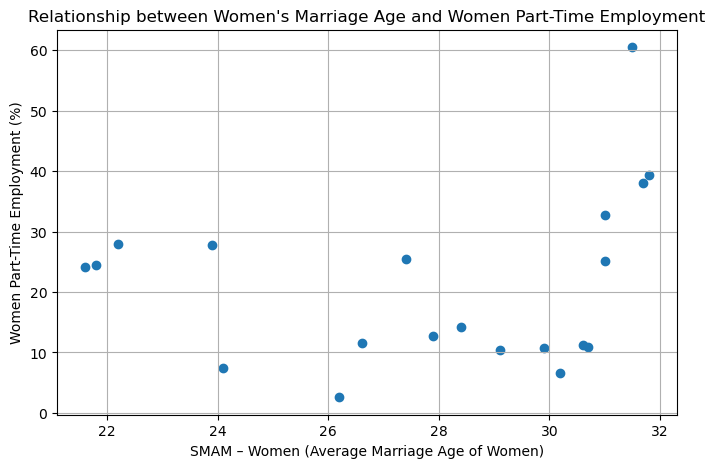

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(cross_pt_mar["SMAM_Women"], cross_pt_mar["Women_PT"])
plt.xlabel("SMAM – Women (Average Marriage Age of Women)")
plt.ylabel("Women Part-Time Employment (%)")
plt.title("Relationship between Women's Marriage Age and Women Part-Time Employment")
plt.grid(True)
plt.show()

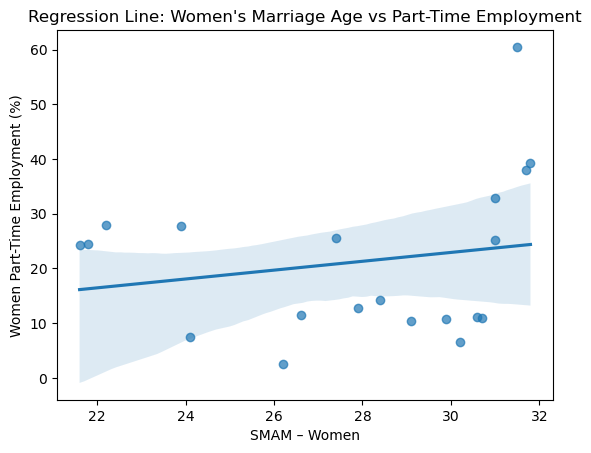

In [52]:
sns.regplot(x=cross_pt_mar["SMAM_Women"], 
            y=cross_pt_mar["Women_PT"],
            scatter_kws={"alpha":0.7})
plt.xlabel("SMAM – Women")
plt.ylabel("Women Part-Time Employment (%)")
plt.title("Regression Line: Women's Marriage Age vs Part-Time Employment")
plt.show()

2. **SMAM_Women and Women_Share_PT**

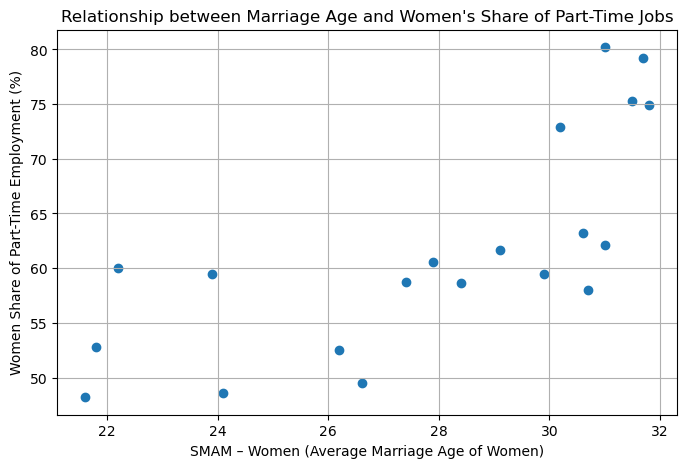

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(cross_pt_mar["SMAM_Women"], cross_pt_mar["Women_Share_PT"])
plt.xlabel("SMAM – Women (Average Marriage Age of Women)")
plt.ylabel("Women Share of Part-Time Employment (%)")
plt.title("Relationship between Marriage Age and Women's Share of Part-Time Jobs")
plt.grid(True)
plt.show()

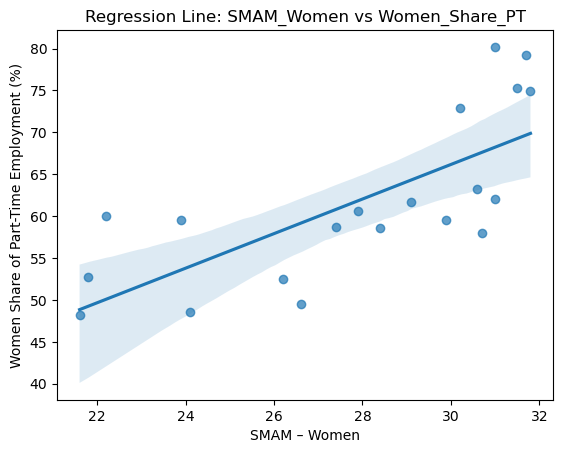

In [46]:
sns.regplot(x=cross_pt_mar["SMAM_Women"], 
            y=cross_pt_mar["Women_Share_PT"],
            scatter_kws={"alpha":0.7})
plt.xlabel("SMAM – Women")
plt.ylabel("Women Share of Part-Time Employment (%)")
plt.title("Regression Line: SMAM_Women vs Women_Share_PT")
plt.show()

### Interpretation – Women

Yes, there is a visible relationship for women.  
The regplot, the scatter plots and the correlation matrix indicate that countries where women marry later tend to have a higher female share of part-time employment (**Women_Share_PT**).  
This means that, in these countries, part-time jobs are more strongly dominated by women.

The relationship between women’s marriage age and the percentage of women working part-time (**Women_PT**) exists but is weaker and shows more dispersion.

For women, we analysed three variables from the merged dataset:
- **SMAM_Women** – average age at marriage for women  
- **Women_PT** – percentage of adult women in part-time employment  
- **Women_Share_PT** – women’s share of all part-time workers  

The correlation matrix shows two main patterns:

1. **SMAM_Women and Women_PT**  
   The correlation is positive but small (around **0.20**).  
   This suggests that countries where women marry later tend to have slightly higher levels of female part-time employment, but the relationship is weak and contains many exceptions.  
   The scatter plot and the regplot confirm this: the points are widely spread, with only a light upward tendency.

2. **SMAM_Women and Women_Share_PT**  
   Here the correlation is much stronger (around **0.73**).  
   In the scatter plot and regplot we clearly see that countries with higher average marriage age for women also tend to have a higher female share of part-time jobs.  
   This means that in these countries, not only do women marry later, but they also dominate part-time employment more strongly.

Overall, the analysis for women indicates that marriage age is more closely related to **how dominant women are within part-time work (Women_Share_PT)** than to the simple percentage of women working part-time (Women_PT).  
In other words, later marriage is associated with a labour market where part-time jobs are more clearly concentrated among women.

## Is there a relationship between the marriage ages of Men and their occupations?

In [47]:
# Select the columns needed for the analysis (Men)
cols_men = ["SMAM_Men", "Men_PT"]
data_men = cross_pt_mar[cols_men]

# Show the first rows to confirm
data_men.head()

,SMAM_Men,Men_PT
0,33.6,7.0
1,31.9,7.8
2,29.8,2.1
3,29.3,11.8
4,NaN,12.7


In [48]:
# Compute the correlation matrix for men
correlation_matrix_men = data_men.corr()

# Display the correlation results
correlation_matrix_men


,SMAM_Men,Men_PT
SMAM_Men,1.000000,-0.273196
Men_PT,-0.273196,1.000000


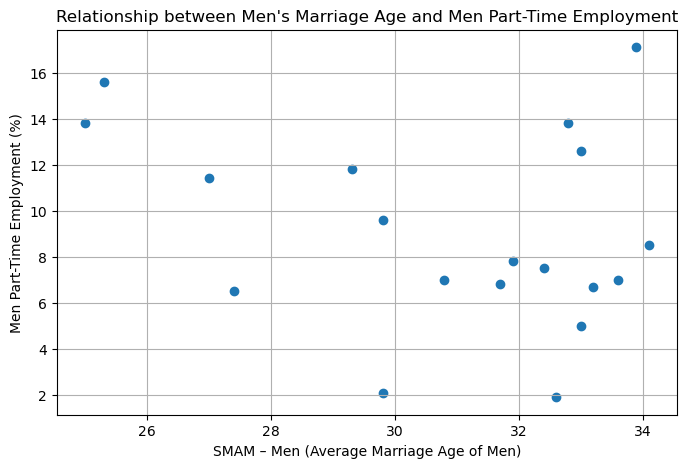

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(cross_pt_mar["SMAM_Men"], cross_pt_mar["Men_PT"])
plt.xlabel("SMAM – Men (Average Marriage Age of Men)")
plt.ylabel("Men Part-Time Employment (%)")
plt.title("Relationship between Men's Marriage Age and Men Part-Time Employment")
plt.grid(True)
plt.show()

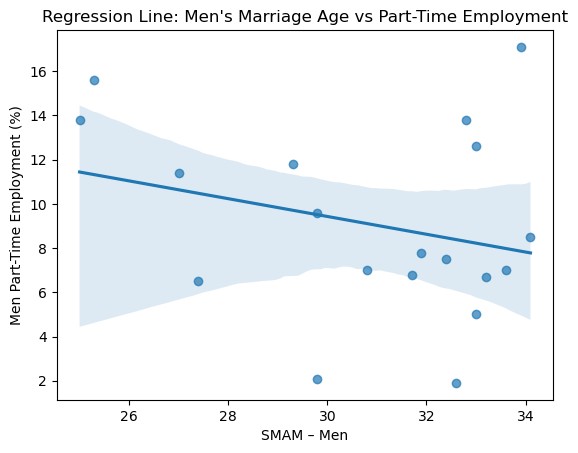

In [51]:
sns.regplot(x=cross_pt_mar["SMAM_Men"], 
            y=cross_pt_mar["Men_PT"],
            scatter_kws={"alpha":0.9})
plt.xlabel("SMAM – Men")
plt.ylabel("Men Part-Time Employment (%)")
plt.title("Regression Line: Men's Marriage Age vs Part-Time Employment")
plt.show()

### Interpretation – Men

No, there is no clear relationship for men.  
Men’s part-time employment (**Men_PT**) remains low across all countries, regardless of their average marriage age.  
The scatter plot and regplot shows no pattern, and the correlation values are very small.

The results indicate no meaningful relationship between men’s marriage age and their occupational behaviour.  
Male part-time employment is consistently low and does not vary with marriage timing.  
This suggests that men's labour patterns are stable and focused on full-time employment, meaning that marriage timing does not impact men’s occupations in the same way as it does for women.

The correlation table and the scatter plot confirm that men rarely work part-time, and the values of **Men_PT** remain consistently small regardless of **SMAM_Men**.

Therefore, no clear relationship appears between men's average marriage age and their part-time employment.

### Final Conclusion

There is a relationship between marriage age and occupational patterns for women, but not for men.  
For women, later marriage is/can be associated with a stronger presence in part-time employment, especially in terms of their share of total part-time workers.  
For men, part-time participation remains low and shows no consistent pattern with marriage age.

Overall, the connection between marriage age and occupation is clearly gender-dependent and is much more visible among women.